In [1]:
import torch
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import torchshow as ts
print(torch.__version__)

2.2.0+cu118


`Torchshow` = https://github.com/xwying/torchshow
An extra library to visualize the tensor. It is mostly used on NN imaginng but is decent for to comprehend the Tensors. 

# Fundamentals

## Introduction to Tensor

### Creating Tensors

pyTorch Tensors are created using `torch.Tensor()` = https://pytorch.org/docs/stable/tensors.html

`x.ndim`  = # of dimensions.

`x.item`  = Tensor as Python int.

`x.shape` = Shape of the tensor.

`x.device` = Where the tensor is stored. 

In [2]:
#Scalar
scalar = torch.tensor(7)
scalar
scalar.ndim
scalar.shape
scalar.item()
scalar

tensor(7)

In [84]:
#Vector
vector = torch.tensor([7, 7])
vector
vector.ndim
vector.shape

torch.Size([2])

In [4]:
#MATRIX
MATRIX = torch.tensor([[1, 2],
                       [3, 4]])
MATRIX
MATRIX.ndim
MATRIX[0]
MATRIX.shape

torch.Size([2, 2])

In [5]:
#TENSOR
TENSOR = torch.tensor([[[1, 2, 3],
                        [4, 5, 6],
                        [7, 8, 9]]])
TENSOR
TENSOR.ndim  # 3
TENSOR.shape # torch.Size([1, 3, 3]) - Means 1 dimensional 3x3 matrix
TENSOR[0]


tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])

In [6]:
# Different ways of initilazing Tensors
data = [[1, 2],[3, 4]]
x_data = torch.tensor(data)

np_array = np.array(data)
x_np = torch.from_numpy(np_array)

### Random Tensors

Random tensors are important because the way many neural networks learn is that they start with tensors full of random numbers and then adjust those random numbers to better represent the data.

`Start with random numbers -> Look at data -> Update random numbers -> look at data ->Update random numbers`

Torch random tensors - https://pytorch.org/docs/stable/generated/torch.rand.html

In [7]:
# Create a random tensor of size (3, 4)
random_tensor = torch.rand(3, 4)
random_tensor

tensor([[0.7380, 0.0907, 0.3176, 0.8528],
        [0.1073, 0.2244, 0.4697, 0.7871],
        [0.3551, 0.9646, 0.9455, 0.4410]])

In [8]:
# Create a random tensor with similar shape to an image tensor
random_image_size_tensor = torch.rand(224, 224, 3) # height(Column), width(Row), colour challens(R G B)[Dimensions?]
# random_image_size_tensor = torch.rand(size = (224, 224, 3)) #With using dynamic tuple
random_image_size_tensor.shape, random_image_size_tensor.ndim

(torch.Size([224, 224, 3]), 3)

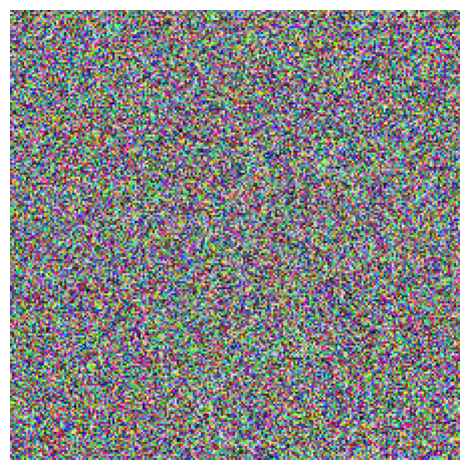

In [9]:
random_image_size_tensor
ts.show(random_image_size_tensor)

### Zeros and Ones

In [10]:
# Create a tensor of all zeros

zeros = torch.zeros(size = (3, 4))
zeros

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])

In [11]:
# Create a tensor of all ones

ones = torch.ones(size=(3,4))
ones

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])

### Creating a range of tensors and tensors-like

`torch.arange` = https://pytorch.org/docs/stable/generated/torch.arange.html

In [12]:
torch.arange(0, 10)
zero_to_fiffty = torch.arange(start= 0, end= 51, step= 5)
zero_to_fiffty

tensor([ 0,  5, 10, 15, 20, 25, 30, 35, 40, 45, 50])

In [13]:
# Dynamically creating a tensor with the same shape of another
my_tensor_like = torch.zeros_like(input=zero_to_fiffty)
my_tensor_like

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

### Tensor Datatypes

**Note:** Possible big error types in PyTorch and Deep Learning
1. Tensors not right datatype. `tensor.dtype`
2. Tensors not right shape. `tensor.shape`/ `tensor.size()`
3. Tensors not on the right device. `tensor.device`

In [14]:
# Float 32 tensor
float_32_tensor = torch.tensor([3.4, 6.7, 9.10],
                               dtype=None,  #data type of the tensor [float32, float16]
                               device=None, #CPU/GPU "cpu", "cuda"
                               requires_grad=False) #Whether or not to track gradients with this tensors operations
float_32_tensor, float_32_tensor.dtype

(tensor([3.4000, 6.7000, 9.1000]), torch.float32)

In [15]:
float_16_tensor = float_32_tensor.type(torch.float16) # toch.half
float_16_tensor

tensor([3.4004, 6.6992, 9.1016], dtype=torch.float16)

In [16]:
float_16_tensor * float_32_tensor

tensor([11.5613, 44.8848, 82.8242])

In [17]:
int_32_tensor = torch.tensor([3, 6, 9], dtype=torch.int32)
int_32_tensor

tensor([3, 6, 9], dtype=torch.int32)

In [18]:
float_32_tensor * int_32_tensor

tensor([10.2000, 40.2000, 81.9000])

In [19]:
some_tensor = torch.rand(3, 4)
some_tensor

tensor([[0.0896, 0.3149, 0.6002, 0.0283],
        [0.9428, 0.4611, 0.9027, 0.0835],
        [0.3949, 0.8104, 0.0168, 0.0149]])

In [20]:
some_tensor.dtype, some_tensor.shape, some_tensor.device

(torch.float32, torch.Size([3, 4]), device(type='cpu'))

### Manipulating Tensors (Tensor Operations)

* Addition
* Substraction
* Multiplication (element-wise)
* Division
* Matrix Multiplication
* Transpose

In [21]:
# Python Operations
tensor = torch.tensor([1, 2, 3])
tensor + 10, tensor - 10, tensor * 10, tensor / 10

(tensor([11, 12, 13]),
 tensor([-9, -8, -7]),
 tensor([10, 20, 30]),
 tensor([0.1000, 0.2000, 0.3000]))

In [22]:
# PyTorch built-in
torch.add(tensor, 10), torch.sub(tensor, 10), torch.mul(tensor, 10), torch.div(tensor, 10)

(tensor([11, 12, 13]),
 tensor([-9, -8, -7]),
 tensor([10, 20, 30]),
 tensor([0.1000, 0.2000, 0.3000]))

In [23]:
# Matrix Multiplicatio / DOT Product
torch.matmul(tensor, tensor) #torch.mm(tensor, tensor)

tensor(14)

In [24]:
# Transpose
tensor_A = torch.tensor([[1, 2],
                         [3, 4],
                         [5, 6]])
tensor_A.T

tensor([[1, 3, 5],
        [2, 4, 6]])

## Tensor Aggregation

### Finding the min, max, mean, sum etc

In [25]:
x = torch.arange(0, 100, 10)
x

tensor([ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90])

In [26]:
# Find the min 
torch.min(x), x.min()

(tensor(0), tensor(0))

In [27]:
# Find the max
torch.max(x), x.max()

(tensor(90), tensor(90))

In [28]:
# Find the mean
# torch.mean() Will not work on int64/Long datatype hence the datatype changed
torch.mean(x.type(torch.float32)), x.type(torch.float32).mean()

(tensor(45.), tensor(45.))

In [29]:
# Find the sum
torch.sum(x), x.sum()

(tensor(450), tensor(450))

In [30]:
# Find the max, min values index
torch.argmax(x), torch.argmin(x)

(tensor(9), tensor(0))

## Reshaping, Stacking, Squeezing and Unsqueezing Tensors

* Reshaping - reshapes an input tensor to a defined shape
* View - Return a view of u
* Stacking - vstack - hstack
* Squeeze
* Unsqueeze
* Permute


In [31]:
b = torch.tensor([[1, 2, 3, 4, 5], [6, 7, 8, 9, 10]])
b, b.shape

(tensor([[ 1,  2,  3,  4,  5],
         [ 6,  7,  8,  9, 10]]),
 torch.Size([2, 5]))

In [32]:
# Reshaping
b = b.reshape(10,) # b.reshape(-1, )
b, b.shape

(tensor([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]), torch.Size([10]))

In [33]:
torch.reshape(b, (2,5)), b.reshape(5, 2)

(tensor([[ 1,  2,  3,  4,  5],
         [ 6,  7,  8,  9, 10]]),
 tensor([[ 1,  2],
         [ 3,  4],
         [ 5,  6],
         [ 7,  8],
         [ 9, 10]]))

In [34]:
# Change the view 
# View of a Tensor shares the same memory as the input. Changing c will also change b
# Much like C/C++ pointers
c = b.view(1, 10)
b, c

(tensor([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 tensor([[ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]]))

In [35]:
c[:, 0] = 5
b, c

(tensor([ 5,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 tensor([[ 5,  2,  3,  4,  5,  6,  7,  8,  9, 10]]))

In [36]:
# Stack tensors on top of each other
b_stacked0 = torch.stack([b, b, b, b], dim=0)
b_stacked1 = torch.stack([b, b, b, b], dim=1)
b_stacked0,b_stacked1

(tensor([[ 5,  2,  3,  4,  5,  6,  7,  8,  9, 10],
         [ 5,  2,  3,  4,  5,  6,  7,  8,  9, 10],
         [ 5,  2,  3,  4,  5,  6,  7,  8,  9, 10],
         [ 5,  2,  3,  4,  5,  6,  7,  8,  9, 10]]),
 tensor([[ 5,  5,  5,  5],
         [ 2,  2,  2,  2],
         [ 3,  3,  3,  3],
         [ 4,  4,  4,  4],
         [ 5,  5,  5,  5],
         [ 6,  6,  6,  6],
         [ 7,  7,  7,  7],
         [ 8,  8,  8,  8],
         [ 9,  9,  9,  9],
         [10, 10, 10, 10]]))

In [37]:
b_vstack = torch.vstack([b,b])
b_hstack = torch.hstack([b,b])
b_vstack,b_hstack

(tensor([[ 5,  2,  3,  4,  5,  6,  7,  8,  9, 10],
         [ 5,  2,  3,  4,  5,  6,  7,  8,  9, 10]]),
 tensor([ 5,  2,  3,  4,  5,  6,  7,  8,  9, 10,  5,  2,  3,  4,  5,  6,  7,  8,
          9, 10]))

In [38]:
#   torch.unsqueeze() adds a single dimension
#   torch.squeeze() removes all the single dimensions
c_squeezed = c.squeeze()
cus0 = c.unsqueeze(dim=0)
cus1 = c_squeezed.unsqueeze(dim=1)

print(f"Original Tensor: {c}, Shape: {c.shape}")
print(f"Squeezed version: {c_squeezed}, Shape: {c_squeezed.shape}")
print(f"Unsqueezed version: {cus0}, Shape: {cus0.shape}")
print(f"Squeezed Tensor unsqueezed on dim1 version: {cus1}, Shape: {cus1.shape}")


Original Tensor: tensor([[ 5,  2,  3,  4,  5,  6,  7,  8,  9, 10]]), Shape: torch.Size([1, 10])
Squeezed version: tensor([ 5,  2,  3,  4,  5,  6,  7,  8,  9, 10]), Shape: torch.Size([10])
Unsqueezed version: tensor([[[ 5,  2,  3,  4,  5,  6,  7,  8,  9, 10]]]), Shape: torch.Size([1, 1, 10])
Squeezed Tensor unsqueezed on dim1 version: tensor([[ 5],
        [ 2],
        [ 3],
        [ 4],
        [ 5],
        [ 6],
        [ 7],
        [ 8],
        [ 9],
        [10]]), Shape: torch.Size([10, 1])


In [39]:
# torch.permute() - rearranges the dimensions of a target tensor in a specific order
x_og = torch.rand(size = (224, 224, 3))
x_permuted = x_og.permute(2, 0, 1) # Shifting axis 0->1, 1->2, 2->0
x_permuted.shape

torch.Size([3, 224, 224])

## Indexing 


In [40]:
x = torch.arange(1, 10).reshape(1, 3, 3)
x, x.shape

(tensor([[[1, 2, 3],
          [4, 5, 6],
          [7, 8, 9]]]),
 torch.Size([1, 3, 3]))

In [46]:
x[0],x[0, 0], x[0, 2, 2]

(tensor([[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]]),
 tensor([1, 2, 3]),
 tensor(9))

In [55]:
# x[ outter-dimension, raw, column]
x[:, 0,], x[:, :, 2]

(tensor([[1, 2, 3]]), tensor([[3, 6, 9]]))

## PyTorch Tensor and Numpy

In [61]:
# NumPy to Tensor
array = np.arange(1.0, 8.0)
tensor = torch.from_numpy(array).type(torch.float32)
array, array.dtype, tensor, tensor.dtype

(array([1., 2., 3., 4., 5., 6., 7.]),
 dtype('float64'),
 tensor([1., 2., 3., 4., 5., 6., 7.]),
 torch.float32)

In [63]:
# Tensor to NumPy
tensor = torch.ones(7)
numpy_tensor = tensor.numpy()
tensor, numpy_tensor

(tensor([1., 1., 1., 1., 1., 1., 1.]),
 array([1., 1., 1., 1., 1., 1., 1.], dtype=float32))

## Reproducbility (Trying to take randomness out of random)

`https://pytorch.org/docs/stable/notes/randomness.html`


* Neural network learning flow:

`Start with random numbers -> Tensor operations -> Update numbers to better represent data -> Repeate`

To reduce the randomness in neural networks and PyTorch comes the concept of **random seed**

Essentially what the random seed does is "Flavour" the randomness.

In [68]:
random_tensor_A = torch.rand(3, 4)
random_tensor_B = torch.rand(3, 4)
print(random_tensor_A)
print(random_tensor_B)
print(random_tensor_A == random_tensor_B)

tensor([[0.9938, 0.9815, 0.1912, 0.0873],
        [0.2390, 0.5673, 0.6476, 0.9431],
        [0.9534, 0.0996, 0.5600, 0.3114]])
tensor([[0.8962, 0.5419, 0.9016, 0.6307],
        [0.7674, 0.7262, 0.6410, 0.2111],
        [0.8691, 0.0716, 0.6838, 0.2661]])
tensor([[False, False, False, False],
        [False, False, False, False],
        [False, False, False, False]])


In [74]:
# Random but reproducible tensors

# Setting the random seed
RANDOM_SEED = 69 # Can be anything
torch.manual_seed(RANDOM_SEED) # It only works for one line of randomness

random_tensor_C = torch.rand(3, 4)

torch.manual_seed(RANDOM_SEED)
random_tensor_D = torch.rand(3, 4)
print(random_tensor_C)
print(random_tensor_D)
print(random_tensor_C == random_tensor_D)

tensor([[0.8398, 0.8042, 0.1213, 0.5309],
        [0.6646, 0.4077, 0.0888, 0.2429],
        [0.7053, 0.6216, 0.9188, 0.0185]])
tensor([[0.8398, 0.8042, 0.1213, 0.5309],
        [0.6646, 0.4077, 0.0888, 0.2429],
        [0.7053, 0.6216, 0.9188, 0.0185]])
tensor([[True, True, True, True],
        [True, True, True, True],
        [True, True, True, True]])


## Running tensors and PyTorch objects on the GPUs (and making faster computations)

GPU = Faster computation on numbers

1. Google Colab
2. Cloud computing - GCP, AWS, Azure

`https://pytorch.org/docs/stable/notes/cuda.html#best-practices`

### Checking for GPU access with PyTorch

In [75]:
torch.cuda.is_available()

True

In [78]:
# Setup device agnostic Code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

### Putting Tensors (and models) on the GPU

In [80]:
import torch
tensor = torch.tensor([1, 2, 3], device="cpu")
tensor, tensor.device

(tensor([1, 2, 3]), device(type='cpu'))

In [83]:
# Move tensor to GPU (If available)
tensor_on_gpu = tensor.to(device)
tensor_on_gpu

tensor([1, 2, 3], device='cuda:0')